<h1> Perceptron and MLP Classifier </h2>

<h2><u> Goal:</u></h2>
<h4> To successfuly classifer Iris flower according to their species. We want to identify three classes of species provided in the dataset. The species are setosa, versicolor and virginica</h4>

<h1>Import neccessary libraries</h1>

In [287]:
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.pipeline import make_pipeline
from numpy import std
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve,auc, roc_curve
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
import sys
import plotly.express as px
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy
from sklearn.model_selection import cross_val_predict
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import  StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

<h1> Load the data</h1>

In [288]:
iris = load_iris(as_frame=True)
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<h1> Understand the data and perform transformation</h1>

In [289]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [290]:
feature = iris.frame.target.replace([0,1,2], ['setosa','versicolor','virginica']).copy()

In [291]:
iris.frame['flower_class'] = feature
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


<h1> Check for missing values</h1>

In [292]:
iris.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   flower_class       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [293]:
iris.frame.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
flower_class         0
dtype: int64

<h1> Summary statistics</h1>

In [294]:
iris.data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [295]:
iris.data.shape

(150, 4)

<h1> Visualize the data to understand the distribution and outliers</h1>

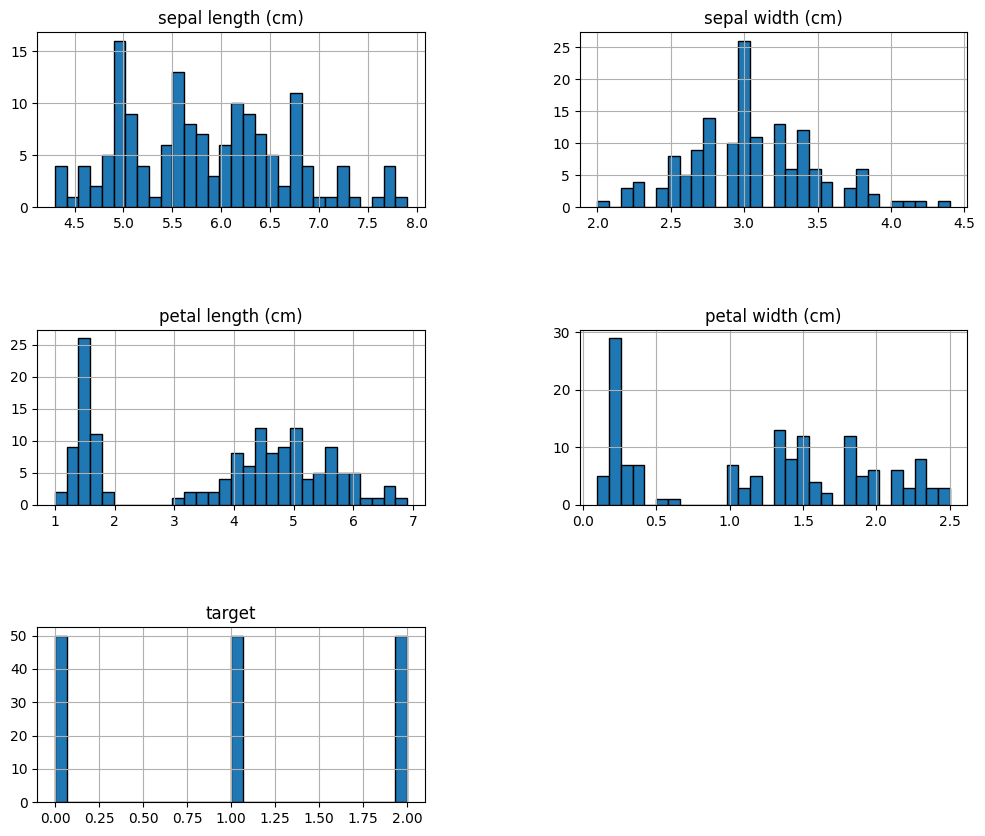

In [296]:
iris.frame.hist(figsize=(12,10),bins=30,edgecolor = 'black')
plt.subplots_adjust(hspace=0.7,wspace=0.4)

In [297]:
y = iris.target.copy()
X = iris.data.values.copy()

In [298]:
fig = px.box(iris.data)
fig.show()

<h1> Detect outliers</h1>
No outliers detected

In [299]:
# Describing IQR to detect outlier position~ alternative to box plot

# Create a function to return index of outliers
def indicies_of_outliers(X):
    q1, q3 = np.percentile(X, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)    #getting more bigger interval
    return np.where((X > upper_bound) | (X < lower_bound))
# Run function
indicies_of_outliers(X)


(array([], dtype=int64), array([], dtype=int64))

<h1> See if the data is balance</h1>
    The data is balance, suitable for our classification task

Text(0, 0.5, 'Count')

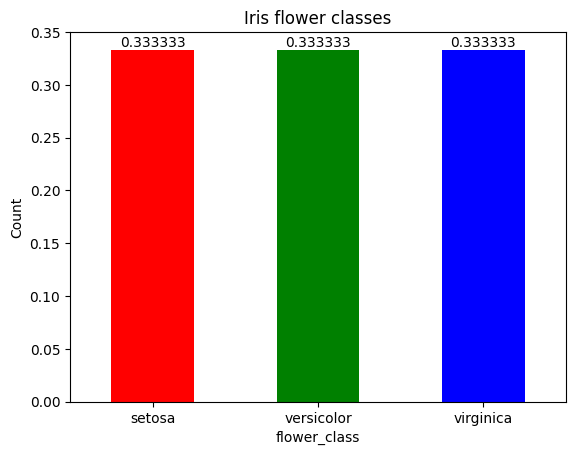

In [300]:
frequency = pd.Series(iris.frame.flower_class.value_counts(normalize=True).sort_index())
fig = frequency.plot(kind ='bar',color=['red','green','blue']) 
fig.bar_label(fig.containers[0])
plt.xticks(rotation = 0)
plt.title('Iris flower classes')
plt.ylabel('Count')

<h1> Understand the correlation of variable with one another</h1>
Feaure 0,2 and 3 are correlated with each other

Text(0.5, 1.0, 'Correlation Matrix')

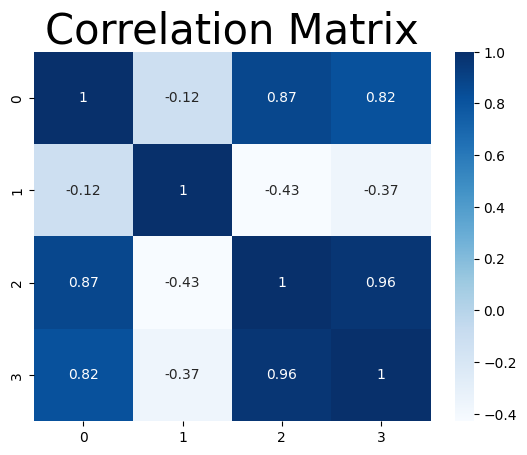

In [301]:
sns.heatmap(pd.DataFrame(X).corr(),annot=True,cmap='Blues')
plt.title("Correlation Matrix", fontsize=30)

As you can see from the correlation matrix, versicolor(1) is the least correlated feature with the target variable. This might someone affect our prediction. But let us find out as we proceed with the classification later on. The Virginica specie is the highest positive correlated feature with the target variable with correlation score value of 0.96 while setosa specie has 0.82 

<h1> Visualizing the distribution</h1>

Text(0.5, 1.0, 'Species Class')

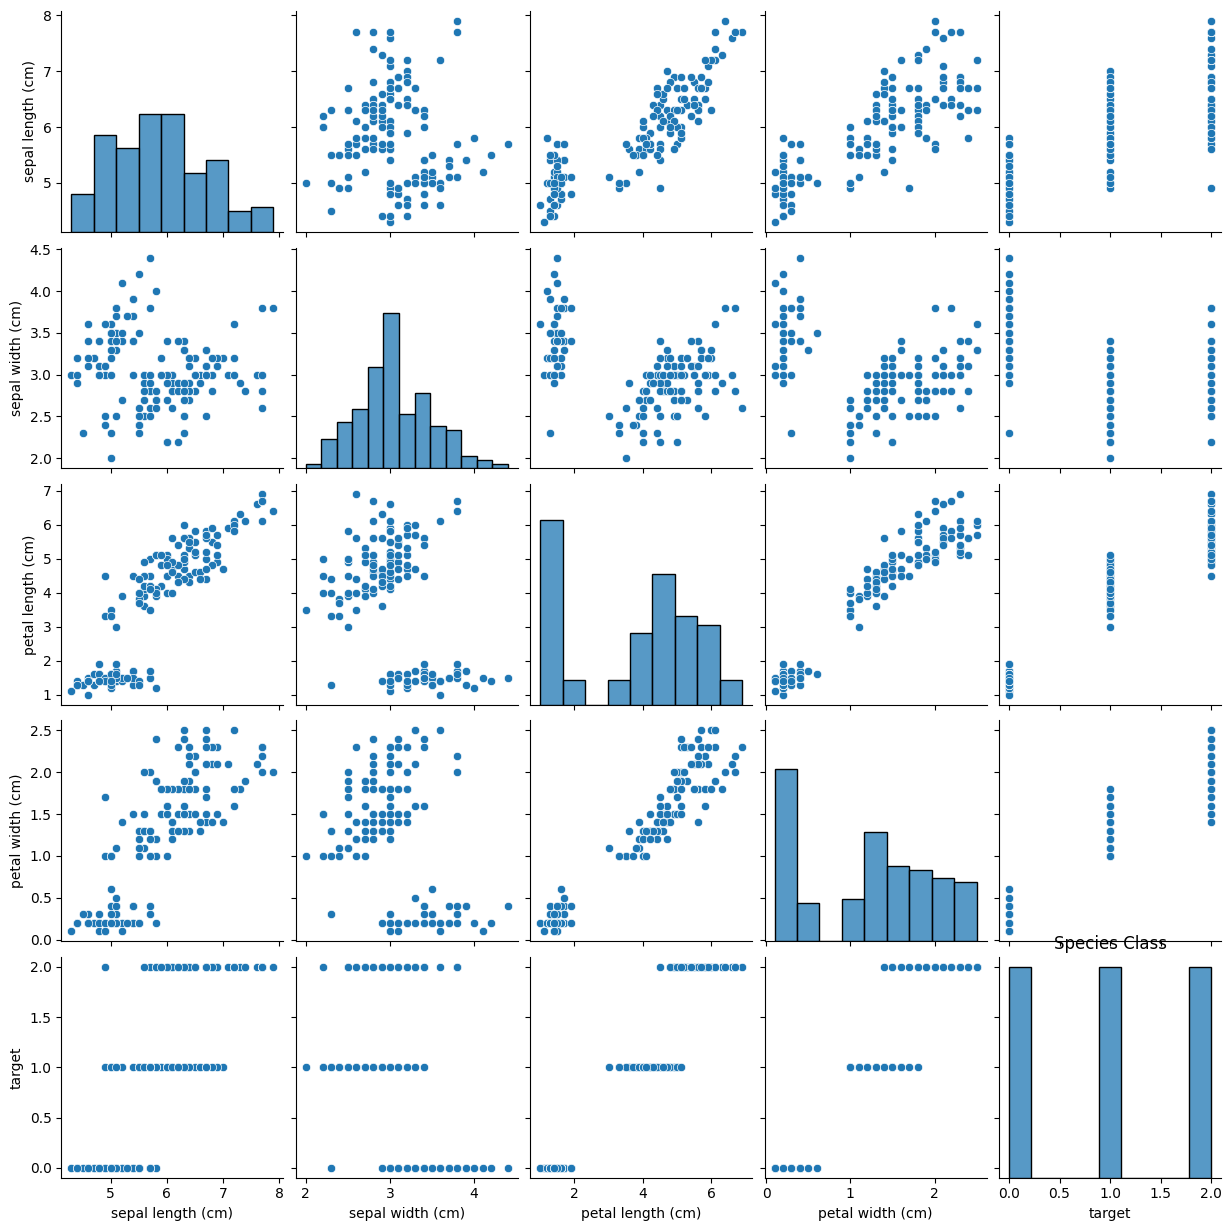

In [302]:
sns.pairplot(data=iris.frame)
plt.title('Species Class')

The species has equal distributions

In [303]:
print("The dataset has 150 rows and 4 columns:\n",iris.data.shape)

The dataset has 150 rows and 4 columns:
 (150, 4)


<h1> K-fold Evaluation implementation with Perceptron</h1>


<h3><u> Choice for K-fold evaluation</u></h3>

<p>Our dataset is small with only 150 rows and 4 columns. If we use the train test split method for training and testing, we will be loosing out a reasonable amount of data that would have been used for training which may affect classification performance.


In [304]:
X_train = iris.data.values
#y_train = iris.frame['flower_class'].values
y_train = iris.target.values

<h1> Scale data to take similar values</h1>
Best practice for machine learning problem

In [305]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).copy()

<h1> Model Selection</h1>

In [306]:
model = Perceptron()

<h1> Training the model </h1>

In [307]:
model.fit(X_train,y_train)

Perceptron()

<h1> Evaluate Model Performance</h1>

In [308]:
scores = cross_val_score(model,X_train,y_train, scoring = 'accuracy',cv=5, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.07


With with  5 k-fold 89% accuracy with a standard deviation of 0.07 was achieved across the data

<h1> Classes involve in classification</h1>

In [309]:
model.classes_

array([0, 1, 2])

<h1> Prediction </h>

<h3> Classes </h3>

In [310]:
y_pred = cross_val_predict(model,X_train,y_train, cv=5,n_jobs=-1)
y_predicted = pd.DataFrame(y_pred)
y_predicted

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,1
147,2
148,2


In [311]:
iris.frame[['target','flower_class']]

,target,flower_class
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


<h3> Prediction Made</h3>

<h1> Error Analysis</h1>

Confusion Matrix Output:
 [[50  0  0]
 [ 1 42  7]
 [ 0  9 41]] 
-----------------------------------------------------------
Length of sample weight (150,)


Text(0.5, 1.0, 'Error Normalized --> Figure 1.3')

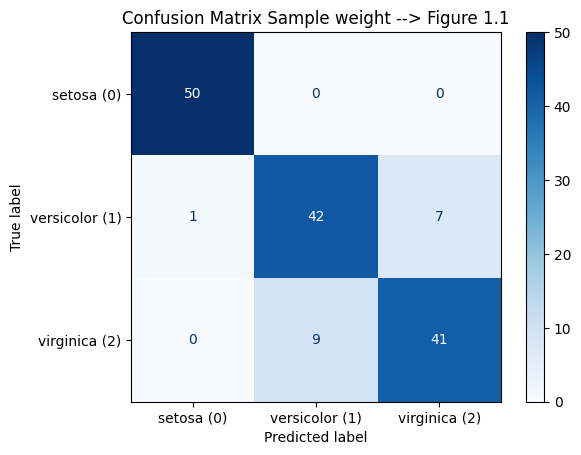

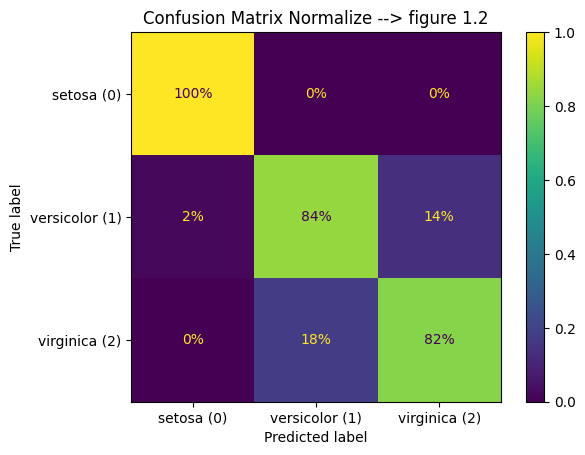

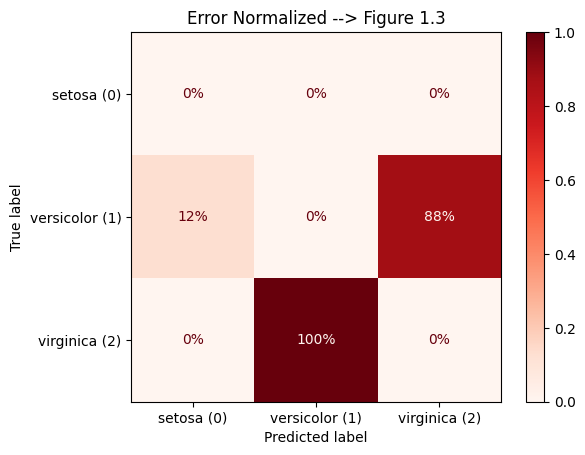

In [312]:
label = ["setosa (0)","versicolor (1)","virginica (2)"]
print("Confusion Matrix Output:\n",confusion_matrix(y_train,y_pred),"\n-----------------------------------------------------------")
weights = (y_train!=y_pred)
print("Length of sample weight",weights.shape)

ConfusionMatrixDisplay.from_predictions(y_train,y_pred, cmap='Blues',display_labels=label)
plt.title("Confusion Matrix Sample weight --> Figure 1.1")



ConfusionMatrixDisplay.from_predictions(y_train,y_pred,normalize='true',values_format=".0%",display_labels=label)
plt.title("Confusion Matrix Normalize --> figure 1.2")

ConfusionMatrixDisplay.from_predictions(y_train,y_pred,sample_weight=weights,cmap ="Reds",normalize='true',values_format='.0%',display_labels=label)#,normalize ='false',values_format=".0%")
plt.title("Error Normalized --> Figure 1.3")



<h1> Result Interpretation</h1>

<h4> Confusion Matrix Sample weight --> Figure 1.1 </h4>
<li> 50 instances of the setosa species were classified correctly</li>
<li> 1 instance of the versicolor species were misclassified as setosa species and 42 instances of the versicolor species were classified correctly</li>
<li> 7 instances of versicolor species were misclassified as virginica.
<li> 9 instances of viginica species were misclassified as versicolor species </li>
<li> 41 samples of virginica species were correctly classified</li>

<h4> Confusion Matrix Normalize --> Figure 1.2 Analysis</h4>
<o>
<li> 100% of the setosa species were classified correctly</li>
<li> 2% of the versicolor species were misclassified as setosa species and 84% of the versicolor species were classified correctly</li>
<li> 12% of versicolor species were misclassified as virginica</li>
<li> 14% of virginica species were misclassified as versicolor species </li>
<li> 18% of virginica species were misclassified as versicolor
<li> 82% virginica species were correctly classified</li>
</o>

<h4> Error Normalized --> Figure 1.3 Analysis</h4>
<li> 12% of the errors the model made on versicolor species were misclassified as setosa species</li>
<li> 88% of the errors the model made on versicolor species  were misclassified as virginica</li>
<li> 100% of the errors the model made on virginica species were misclassified as versicolor</li> 


<h1> Accuracy check</h1>

In [313]:

precision_score(y_train,y_pred,average='micro')

0.8866666666666667

<h1> Classification Report</h1>

In [314]:
print(classification_report(y_train,y_pred),"\n")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.82      0.84      0.83        50
           2       0.85      0.82      0.84        50

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150
 



<h1> Overall result analysis for percentron before hyper parameters tuning</h1>
There are 150 classes, 50 each represent each specie.
<h4><u><b> Setosa species:</u></h4>
The setosa species with a precision of 98% and recall of 100% Our classifier means that the prediction claims 98% positive prediction was actually 100% correct. It is a good prediction, our recall of 100% shows that the classifier did a good job with a harmonic average(f1-score) of 99%. This means we have 100% confident on detecting setosa specie.

<p><h4><u><b> Versicolor Species:</u></h4>
Versicolor species of 82% precision and 84% of recall shows that the classifier claims of 82% prediction that was made to be correct turnout to be 84% correct.
<p><h4<b><u>Virginica Species:</u></h4>
 
The virginica species of 85% precision and 82% recall means that 85% of the virginica species were detected to be virginica species but 82% were actually virginica. For this particular specie the model was not very accurate in it detection but even as at that is still remain a good prediction 
<p> Overall model accuracy was about 89%. Now let us tweak this model to see if we can achieve a better result

<H1> Tuning Perceptron Hyper parameters</h1>

In [315]:
grid = dict()
grid['eta0'] = [0.01,0.001,0.0001,1.0]
grid['max_iter'] = np.arange(1,1500)

# define search
search = GridSearchCV(model,grid, scoring='accuracy',cv=5, n_jobs=-1)
# Execute the search
search_result = search.fit(X_train,y_train)
print("Mean Accuracy: %.2f" % search_result.best_score_)
print("Config: %s" % search_result.best_params_)
# Summarise all 
means = search_result.cv_results_['mean_test_score']
parameters = search_result.cv_results_['params']
for mean , param in zip(means, parameters):
    print(">%.2f with: %r" % (mean,param))

Mean Accuracy: 0.91
Config: {'eta0': 0.01, 'max_iter': 7}
>0.79 with: {'eta0': 0.01, 'max_iter': 1}
>0.78 with: {'eta0': 0.01, 'max_iter': 2}
>0.91 with: {'eta0': 0.01, 'max_iter': 3}
>0.87 with: {'eta0': 0.01, 'max_iter': 4}
>0.88 with: {'eta0': 0.01, 'max_iter': 5}
>0.89 with: {'eta0': 0.01, 'max_iter': 6}
>0.91 with: {'eta0': 0.01, 'max_iter': 7}
>0.91 with: {'eta0': 0.01, 'max_iter': 8}
>0.89 with: {'eta0': 0.01, 'max_iter': 9}
>0.91 with: {'eta0': 0.01, 'max_iter': 10}
>0.90 with: {'eta0': 0.01, 'max_iter': 11}
>0.90 with: {'eta0': 0.01, 'max_iter': 12}
>0.90 with: {'eta0': 0.01, 'max_iter': 13}
>0.90 with: {'eta0': 0.01, 'max_iter': 14}
>0.90 with: {'eta0': 0.01, 'max_iter': 15}
>0.90 with: {'eta0': 0.01, 'max_iter': 16}
>0.90 with: {'eta0': 0.01, 'max_iter': 17}
>0.90 with: {'eta0': 0.01, 'max_iter': 18}
>0.90 with: {'eta0': 0.01, 'max_iter': 19}
>0.90 with: {'eta0': 0.01, 'max_iter': 20}
>0.90 with: {'eta0': 0.01, 'max_iter': 21}
>0.90 with: {'eta0': 0.01, 'max_iter': 22}
>0.90

Here we chose different alpha (step size) between 0 and 1.0. 1500 grid search iteration using stochastic optimizer was done with 5 iterations of the k-fold evaluations techniques on our training data. Upon completion of the hyper parameter tuning, 91% mean accuracy was achieved on alpha (step-size) size of 0.01  better than our previous result of 89% accuracy when the perceptron model was not tweaked. <p>Let go ahead and make a prediction with this result achieved

In [316]:
# define grid
grid_ =  dict()
grid_['max_iter'] = [1,10,50,100,150]

# Let use our well performing learning rate in the previous search
model = Perceptron(eta0=0.001)

# define search
search = GridSearchCV(model,grid_,scoring ='accuracy',cv=7,n_jobs=-1)

# perform the search
results = search.fit(X_train,y_train)

print("Mean Accuracy: %.2f" % results.best_score_)
print("Config: %s" % results.best_params_)
# Summarise all 
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean , param in zip(means, params):
    print(">%.2f with: %r" % (mean,param))
print("Best parameter",results.best_params_)

Mean Accuracy: 0.91
Config: {'max_iter': 10}
>0.82 with: {'max_iter': 1}
>0.91 with: {'max_iter': 10}
>0.91 with: {'max_iter': 50}
>0.91 with: {'max_iter': 100}
>0.91 with: {'max_iter': 150}
Best parameter {'max_iter': 10}


As you can see above, After 5 iterations with with various sample size were performed for each iteration made by the grid search optimizer, GridSearch was able to return the third iteration with accuracy score of 89%

Text(0.5, 1.0, 'Confusion Matrix normalized')

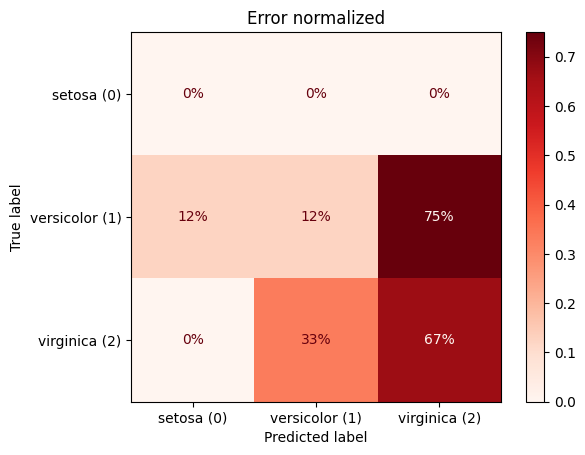

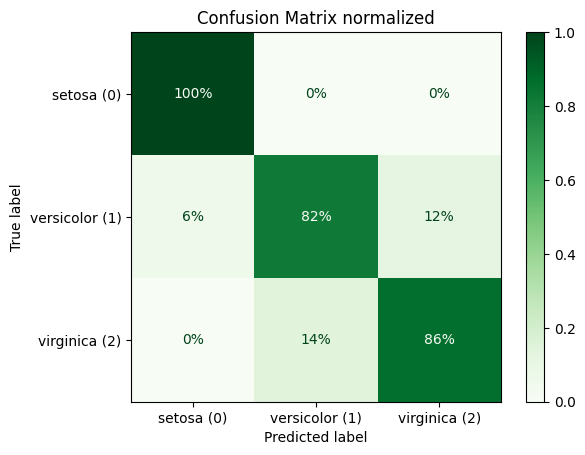

In [317]:
y_hat = cross_val_predict(search,X_train,y_train)

sample_weights = (y_hat != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_hat,sample_weight=weights,cmap ="Reds",normalize='true',values_format='.0%',display_labels=label)
plt.title("Error normalized")


ConfusionMatrixDisplay.from_predictions(y_train,y_hat, cmap ="Greens",normalize='true',values_format='.0%',display_labels=label)
plt.title("Confusion Matrix normalized")

As you can see on the error normalized confusion matrix, the percentage of the errors made by the model when versicolor was misclassified as virginica has reduced from 88% to 75% and additional 12% accuracy was generated. etc. This is the advantage of optimization. It aid efficiency in machine learning

In [318]:
print(classification_report(y_hat,y_train),"\n")

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.82      0.85      0.84        48
           2       0.86      0.88      0.87        49

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150
 



<h3> Let find out how many epochs were used to train the model by exploring configuration value on a logscale between 1 and 1e+4</h3>

<h1> Multi Layer Perceptron (MLP) Classifier Implementation </h1>

<h2> Model Selection and configuration</h2>

I chose three hidden  ayers since we are trying to classify three flowers namely setosa, versicolor and virginica. Each hidden layer for each specie.

In [319]:
mlp_Clf  = MLPClassifier(solver='lbfgs',alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1)

<h1> Training </H1>

In [320]:
X_train = X_train.copy()
y_train = y_train.copy()
mlp_Clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

In [321]:
accuracy=cross_val_score(mlp_Clf, X_train,y_train, scoring = 'accuracy',cv=5,n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracy.mean(), accuracy.std()))

0.97 accuracy with a standard deviation of 0.03


<h1> Error Analysis</h1>

In [322]:
prediction = cross_val_predict(mlp_Clf,X_train,y_train)
sample_error = (y_pred != prediction)

Text(0.5, 1.0, 'Confusion normalized')

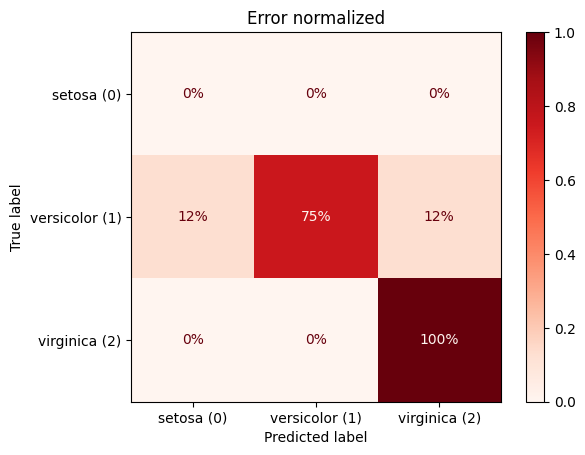

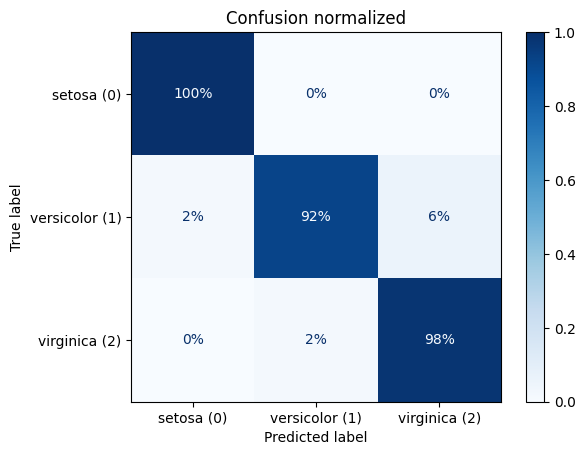

In [323]:
ConfusionMatrixDisplay.from_predictions(y_train,prediction,sample_weight=sample_error,cmap ="Reds",normalize='true',values_format='.0%',display_labels=label)
plt.title("Error normalized")

ConfusionMatrixDisplay.from_predictions(y_train,prediction,cmap ="Blues",normalize='true',values_format='.0%',display_labels=label)
plt.title("Confusion normalized")

As you can see on the error normalized confusion matrix, the percentage of the errors made by the model when versicolor was misclassified as virginica has been reduced drastically from 75% to 12% and a total of 75% accuracy for the versicolor specie was achieved. Also the model was able to classify 92% of the versicolor specie correctly which was 86% previously. This is the power of optimization. It aid efficiency in machine learning

<h1>  Prediction accuracy score check</h1>

In [324]:
from sklearn import metrics
print("The accuracy of the multi-layer percentron is:",metrics.accuracy_score(prediction,y_train))

The accuracy of the multi-layer percentron is: 0.9666666666666667


<h1> Generate classification report</h1>

In [325]:
print("Percetron performance result\n","--------------------------------------------------------------\n")
print(classification_report(y_train,y_pred))

print("percentron model performance after tweaking\n","----------------------------------------------------------\n")
print(classification_report(y_train,y_hat))

print("Multi Layer Percentron performance result\n","-------------------------------------------------------------\n")
print(classification_report(y_train,prediction))

Percetron performance result
 --------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.82      0.84      0.83        50
           2       0.85      0.82      0.84        50

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

percentron model performance after tweaking
 ----------------------------------------------------------

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       0.85      0.82      0.84        50
           2       0.88      0.86      0.87        50

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

Multi Layer Percentron performance resu

Wow! Amazon  as you can see the Multi layer percetron achieved 97% accuracy different from our initial percetron result with a higher precision and recall of 98% and 92% for the  versicolor species better than our former result. As we may notice, setosa has the highest precision and recall score of 100% and 99% while virginica has about 94% precision and 98% recall. 
<p> For the versicolor specie least performance may be affected by it correlation with the target class.
For the multi layer classifier, 97% accuracy after performing prediction while the perceptron achieved 89% after hyper tuning